In [1]:
import ROOT, math
import numpy as np

Welcome to JupyROOT 6.30/06


In [2]:
FileAAData = ROOT.TFile("Input/PbPbData_Reco.root")
FilePPData = ROOT.TFile("Input/PPData_Reco.root")
FileMBData = ROOT.TFile("Input/MinBiasData_Reco9.root")
FileMBGen  = ROOT.TFile("Input/MinBiasMC_Gen.root")
FileMBReco = ROOT.TFile("Input/MinBiasMC_Reco.root")
FileDYGen  = ROOT.TFile("Input/DYLLMC_Gen.root")
FileDYReco = ROOT.TFile("Input/DYLLMC_Reco.root")
FilePPGen  = ROOT.TFile("Input/PPMC_Gen.root")
FilePPReco = ROOT.TFile("Input/PPMC_Reco.root")

def CleanUp():
    FileAAData.Close()
    FilePPData.Close()
    FileMBData.Close()
    FileMBGen.Close()
    FileMBReco.Close()
    FileDYGen.Close()
    FileDYReco.Close()
    FilePPGen.Close()
    FilePPReco.Close()

TreeAAData = FileAAData.Get("Tree")
TreePPData = FilePPData.Get("Tree")
TreeMBData = FileMBData.Get("Tree")
TreeMBGen  = FileMBGen.Get("Tree")
TreeMBReco = FileMBReco.Get("Tree")
TreeDYGen  = FileDYGen.Get("Tree")
TreeDYReco = FileDYReco.Get("Tree")
TreePPGen  = FilePPGen.Get("Tree")
TreePPReco = FilePPReco.Get("Tree")

In [3]:
Canvas = ROOT.TCanvas("Canvas", "")
MinPT = 2
MinZPT = 40

In [4]:
TreeAAData.SetAlias("GoodRecoZ", f"(zPt[0] > {MinZPT} && zY[0] > -2.4 && zY[0] < 2.4 && zMass[0] > 60 && zMass[0] < 120)")
TreePPData.SetAlias("GoodRecoZ", f"(zPt[0] > {MinZPT} && zY[0] > -2.4 && zY[0] < 2.4 && zMass[0] > 60 && zMass[0] < 120)")
TreeDYReco.SetAlias("GoodRecoZ", f"(zPt[0] > {MinZPT} && zY[0] > -2.4 && zY[0] < 2.4 && zMass[0] > 60 && zMass[0] < 120)")
TreePPReco.SetAlias("GoodRecoZ", f"(zPt[0] > {MinZPT} && zY[0] > -2.4 && zY[0] < 2.4 && zMass[0] > 60 && zMass[0] < 120)")
TreeDYGen.SetAlias("GoodGenZ", f"(genZPt[0] > {MinZPT} && genZY[0] > -2.4 && genZY[0] < 2.4 && genZMass[0] > 60 && genZMass[0] < 120)")
TreePPGen.SetAlias("GoodGenZ", f"(genZPt[0] > {MinZPT} && genZY[0] > -2.4 && genZY[0] < 2.4 && genZMass[0] > 60 && genZMass[0] < 120)")

True

In [31]:
HDataCentrality = ROOT.TH1D("HDataCentrality", ";Centrality (%);a.u. (Normalized to unit area)", 20, 0, 100)

TreeAAData.Draw("hiBin*0.5>>HDataCentrality", "GoodRecoZ")

HDataCentrality.Scale(1 / HDataCentrality.Integral() / (0.05))

HDataCentrality.SetStats(0)
HDataCentrality.SetLineWidth(2)
HDataCentrality.SetLineColor(ROOT.kBlack)
HDataCentrality.SetMarkerStyle(20)
HDataCentrality.SetMarkerColor(ROOT.kBlack)

HDataCentrality.Draw()

Latex = ROOT.TLatex()
Latex.SetTextFont(42)
Latex.SetTextSize(0.05)
Latex.SetTextAlign(11)
Latex.SetNDC()
Latex.DrawLatex(0.10, 0.91, "#bf{CMS} #scale[0.8]{#font[52]{Preliminary}}")

Latex.SetTextSize(0.035)
Latex.SetTextAlign(31)
Latex.DrawLatex(0.90, 0.91, "PbPb 5.02 TeV (1.67 nb^{-1})")

Latex.SetTextSize(0.035)
Latex.SetTextAlign(11)

Latex.DrawLatex(0.55, 0.75, "p_{T,Z} > " + str(MinZPT) + " GeV, |y_{Z}| < 2.4")
Latex.DrawLatex(0.55, 0.70, "p_{T,#mu} > 20, |#eta_{#mu}| < 2.4")

Canvas.Draw()
Canvas.SaveAs("HDataCentrality_GoodZ.png");
Canvas.SaveAs("HDataCentrality_GoodZ.pdf");


Warning in <TFile::Append>: Replacing existing TH1: HDataCentrality (Potential memory leak).
Info in <TCanvas::Print>: png file HDataCentrality_GoodZ.png has been created
Info in <TCanvas::Print>: pdf file HDataCentrality_GoodZ.pdf has been created


Warning in <TFile::Append>: Replacing existing TH1: PDataHFVertex (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PRecoHFVertex (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PRecoHFPU (Potential memory leak).


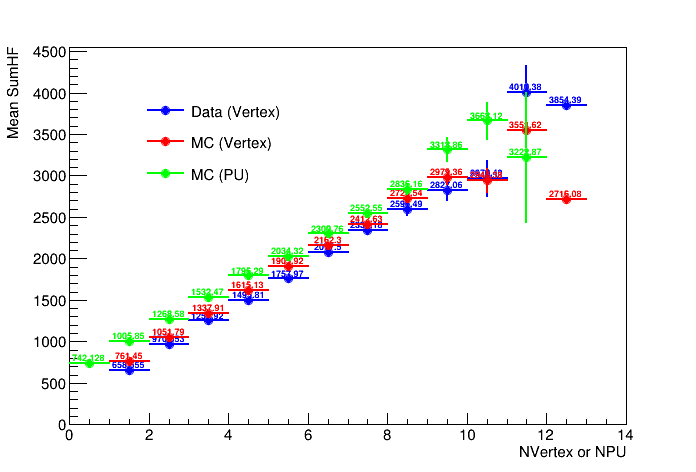

In [36]:
PDataHFVertex = ROOT.TProfile("PDataHFVertex", ";NVertex or NPU;Mean SumHF", 14, 0, 14)
PRecoHFVertex = ROOT.TProfile("PRecoHFVertex", ";NVertex;Mean SignalHF", 14, 0, 14)
PRecoHFPU     = ROOT.TProfile("PRecoHFPU", ";NPU;Mean SignalHF", 14, 0, 14)

TreePPData.Draw("SignalHF:NVertex>>PDataHFVertex", "GoodRecoZ", "prof")
TreePPReco.Draw("SignalHF:NVertex>>PRecoHFVertex", "GoodRecoZ", "prof")
TreePPReco.Draw("SignalHF:NPU>>PRecoHFPU", "GoodRecoZ", "prof")

PDataHFVertex.SetStats(0)
PRecoHFVertex.SetStats(0)
PRecoHFPU.SetStats(0)

PDataHFVertex.SetLineWidth(2)
PDataHFVertex.SetLineColor(ROOT.kBlue)
PDataHFVertex.SetMarkerStyle(20)
PDataHFVertex.SetMarkerColor(ROOT.kBlue)
PRecoHFVertex.SetLineWidth(2)
PRecoHFVertex.SetLineColor(ROOT.kRed)
PRecoHFVertex.SetMarkerStyle(20)
PRecoHFVertex.SetMarkerColor(ROOT.kRed)
PRecoHFPU.SetLineWidth(2)
PRecoHFPU.SetLineColor(ROOT.kGreen)
PRecoHFPU.SetMarkerStyle(20)
PRecoHFPU.SetMarkerColor(ROOT.kGreen)

Legend = ROOT.TLegend(0.2, 0.6, 0.5, 0.8)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.SetFillStyle(0)
Legend.AddEntry(PDataHFVertex, "Data (Vertex)", "lp")
Legend.AddEntry(PRecoHFVertex, "MC (Vertex)", "lp")
Legend.AddEntry(PRecoHFPU, "MC (PU)", "lp")

PDataHFVertex.Draw("prof text00")
PRecoHFVertex.Draw("prof text00 same")
PRecoHFPU.Draw("prof text00 same")

Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

PP Gen =  746.3031575773562
PP Reco =  1267.6932273098503
PP Reco (PU = 0) =  742.1277792948157
PP Reco (PV = 1) =  761.4495308329263
Embedded Gen SubEvent0 =  744.6068381789274
PP Data =  1251.1087503838369
PP Data (PV = 1) =  658.5545601860996


Warning in <TFile::Append>: Replacing existing TH1: HPPGenHF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoHF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoPU0HF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoPV1HF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HDYSubEvent0HF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPDataHF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPDataPV1HF (Potential memory leak).


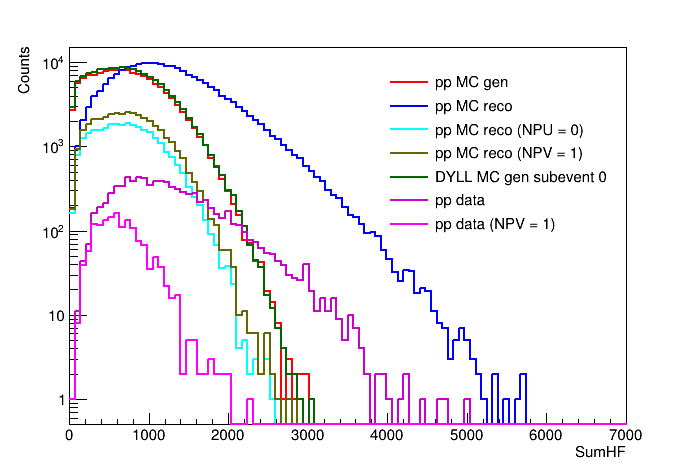

In [40]:
# First let's start by looking at HF distributions for a few different things

HPPGenHF = ROOT.TH1D("HPPGenHF", ";SumHF;Counts", 100, 0, 7000)
HPPRecoHF = ROOT.TH1D("HPPRecoHF", "", 100, 0, 7000)
HPPRecoPU0HF = ROOT.TH1D("HPPRecoPU0HF", "", 100, 0, 7000)
HPPRecoPV1HF = ROOT.TH1D("HPPRecoPV1HF", "", 100, 0, 7000)
HDYSubEvent0HF = ROOT.TH1D("HDYSubEvent0HF", "", 100, 0, 7000)
HPPDataHF = ROOT.TH1D("HPPDataHF", "", 100, 0, 7000)
HPPDataPV1HF = ROOT.TH1D("HPPDataPV1HF", "", 100, 0, 7000)

HPPGenHF.SetStats(0)

HPPGenHF.SetLineColor(ROOT.kRed)
HPPRecoHF.SetLineColor(ROOT.kBlue)
HPPRecoPU0HF.SetLineColor(ROOT.kCyan)
HPPRecoPV1HF.SetLineColor(ROOT.kYellow + 3)
HDYSubEvent0HF.SetLineColor(ROOT.kGreen + 3)
HPPDataHF.SetLineColor(ROOT.kMagenta + 1)
HPPDataPV1HF.SetLineColor(ROOT.kMagenta)

HPPGenHF.SetLineWidth(2)
HPPRecoHF.SetLineWidth(2)
HPPRecoPU0HF.SetLineWidth(2)
HPPRecoPV1HF.SetLineWidth(2)
HDYSubEvent0HF.SetLineWidth(2)
HPPDataHF.SetLineWidth(2)
HPPDataPV1HF.SetLineWidth(2)

TreePPGen.Draw("SignalHF>>HPPGenHF", "GoodGenZ")
TreePPReco.Draw("SignalHF>>HPPRecoHF", "GoodRecoZ", "same")
TreePPReco.Draw("SignalHF>>HPPRecoPU0HF", "NPU == 0 && GoodRecoZ", "same")
TreePPReco.Draw("SignalHF>>HPPRecoPV1HF", "NVertex == 1 && GoodRecoZ", "same")
TreeDYGen.Draw("SubEvent0HF>>HDYSubEvent0HF", "GoodGenZ", "same")
TreePPData.Draw("SignalHF>>HPPDataHF", "GoodRecoZ", "same")
TreePPData.Draw("SignalHF>>HPPDataPV1HF", "NVertex == 1 && GoodRecoZ", "same")

Legend = ROOT.TLegend(0.55, 0.85, 0.85, 0.50)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(HPPGenHF, "pp MC gen", "l")
Legend.AddEntry(HPPRecoHF, "pp MC reco", "l")
Legend.AddEntry(HPPRecoPU0HF, "pp MC reco (NPU = 0)", "l")
Legend.AddEntry(HPPRecoPV1HF, "pp MC reco (NPV = 1)", "l")
Legend.AddEntry(HDYSubEvent0HF, "DYLL MC gen subevent 0", "l")
Legend.AddEntry(HPPDataHF, "pp data", "l")
Legend.AddEntry(HPPDataPV1HF, "pp data (NPV = 1)", "l")
Legend.Draw()

Canvas.SetLogy()
Canvas.Draw()

print("PP Gen = ", HPPGenHF.GetMean())
print("PP Reco = ", HPPRecoHF.GetMean())
print("PP Reco (PU = 0) = ", HPPRecoPU0HF.GetMean())
print("PP Reco (PV = 1) = ", HPPRecoPV1HF.GetMean())
print("Embedded Gen SubEvent0 = ", HDYSubEvent0HF.GetMean())
print("PP Data = ", HPPDataHF.GetMean())
print("PP Data (PV = 1) = ", HPPDataPV1HF.GetMean())


True

 FCN=40.6866 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=9.26594e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.61537e+02   1.67598e+00   5.28357e-03   2.56856e-07
 FCN=35.4702 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=3.1804e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.42786e+02   1.92464e+00   5.67519e-03  -4.14386e-07
 FCN=19.1289 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=6.65726e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE 

Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsZPT_NPV1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsZPT_NPU0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PDataSignalHFVsZPT_NPV1 (Potential memory leak).
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)
Error in <TF

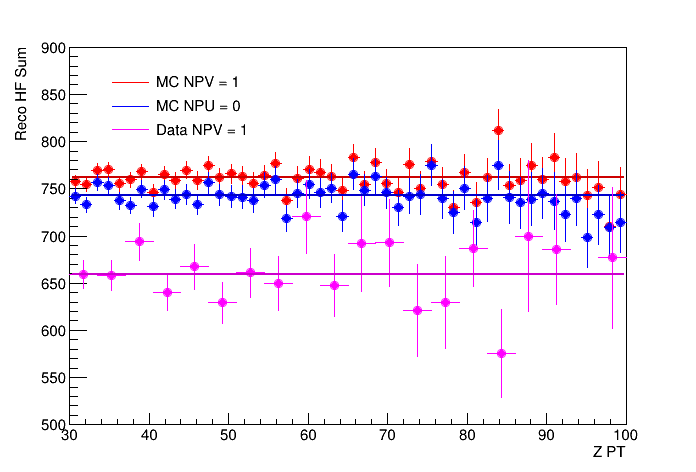

In [12]:
PSignalHFVsZPT_NPV1 = ROOT.TProfile("PSignalHFVsZPT_NPV1", ";Z PT;Reco HF Sum", 50, 30, 100)
PSignalHFVsZPT_NPU0 = ROOT.TProfile("PSignalHFVsZPT_NPU0", "", 50, 30, 100)
PDataSignalHFVsZPT_NPV1 = ROOT.TProfile("PDataSignalHFVsZPT_NPV1", ";Z PT;Reco HF Sum", 20, 30, 100)

PSignalHFVsZPT_NPV1.SetStats(0)
PSignalHFVsZPT_NPU0.SetStats(0)
PDataSignalHFVsZPT_NPV1.SetStats(0)

PSignalHFVsZPT_NPV1.SetMarkerStyle(20)
PSignalHFVsZPT_NPV1.SetMarkerColor(ROOT.kRed)
PSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed)
PSignalHFVsZPT_NPU0.SetMarkerStyle(20)
PSignalHFVsZPT_NPU0.SetMarkerColor(ROOT.kBlue)
PSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue)
PDataSignalHFVsZPT_NPV1.SetMarkerStyle(20)
PDataSignalHFVsZPT_NPV1.SetMarkerColor(ROOT.kMagenta)
PDataSignalHFVsZPT_NPV1.SetLineColor(ROOT.kMagenta)

TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPV1", "NVertex == 1 && zPt[0] < 100", "prof")
TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPU0", "NPU == 0 && zPt[0] < 100", "prof same")
TreePPData.Draw("SignalHF:zPt[0]>>PDataSignalHFVsZPT_NPV1", "NVertex == 1 && zPt[0] < 100", "prof same")

PSignalHFVsZPT_NPV1.GetYaxis().SetRangeUser(500, 900)

FSignalHFVsZPT_NPV1 = ROOT.TF1("FSignalHFVsZPT_NPV1", "[0]", 0, 100)
FSignalHFVsZPT_NPU0 = ROOT.TF1("FSignalHFVsZPT_NPU0", "[0]", 0, 100)
FDataSignalHFVsZPT_NPV1 = ROOT.TF1("FDataSignalHFVsZPT_NPV1", "[0]", 0, 100)

FDataSignalHFVsZPT_NPV1.SetParameters(688, 100, 0.1)

FSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed + 1)
FSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue + 1)
FDataSignalHFVsZPT_NPV1.SetLineColor(ROOT.kMagenta + 1)

PSignalHFVsZPT_NPV1.Fit(FSignalHFVsZPT_NPV1)
PSignalHFVsZPT_NPU0.Fit(FSignalHFVsZPT_NPU0)
PDataSignalHFVsZPT_NPV1.Fit(FDataSignalHFVsZPT_NPV1)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.70)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PSignalHFVsZPT_NPV1, "MC NPV = 1", "l")
Legend.AddEntry(PSignalHFVsZPT_NPU0, "MC NPU = 0", "l")
Legend.AddEntry(PDataSignalHFVsZPT_NPV1, "Data NPV = 1", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()


True

 FCN=100.181 FROM MIGRAD    STATUS=CONVERGED    1082 CALLS        1083 TOTAL
                     EDM=4.48243e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.63154e+02   1.84152e+00   3.66096e-03   3.05812e-06
   2  p1           1.01300e+02   2.71407e+00   7.79492e-03   1.66604e-05
   3  p2           9.66647e-02   6.57148e-03   1.32287e-05  -1.37607e-02
 FCN=82.6348 FROM MIGRAD    STATUS=CONVERGED     616 CALLS         617 TOTAL
                     EDM=4.38493e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.44308e+02   2.04657e+00   3.81003e-03  -6.69996e-05
   2  p1           1.00104e+02   3.15524e+00   8.26326e-03   1.13299e-04
   3  p2           1.01191e-01   

Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsZPT_NPV1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsZPT_NPU0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PDataSignalHFVsZPT_NPV1 (Potential memory leak).


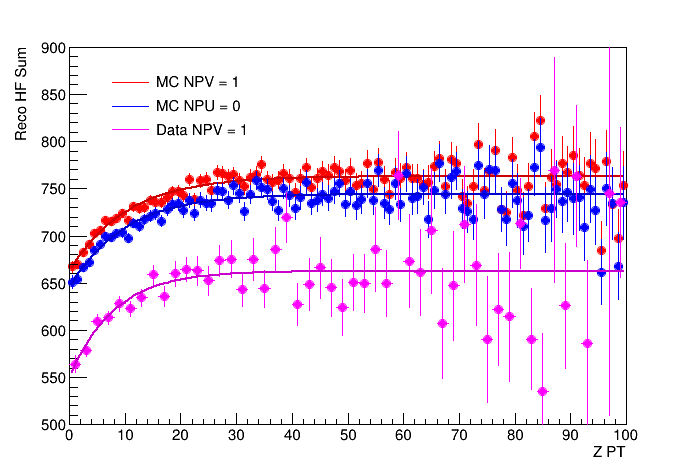

In [35]:
PSignalHFVsZPT_NPV1 = ROOT.TProfile("PSignalHFVsZPT_NPV1", ";Z PT;Reco HF Sum", 100, 0, 100)
PSignalHFVsZPT_NPU0 = ROOT.TProfile("PSignalHFVsZPT_NPU0", "", 100, 0, 100)
PDataSignalHFVsZPT_NPV1 = ROOT.TProfile("PDataSignalHFVsZPT_NPV1", ";Z PT;Reco HF Sum", 50, 0, 100)

PSignalHFVsZPT_NPV1.SetStats(0)
PSignalHFVsZPT_NPU0.SetStats(0)
PDataSignalHFVsZPT_NPV1.SetStats(0)

PSignalHFVsZPT_NPV1.SetMarkerStyle(20)
PSignalHFVsZPT_NPV1.SetMarkerColor(ROOT.kRed)
PSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed)
PSignalHFVsZPT_NPU0.SetMarkerStyle(20)
PSignalHFVsZPT_NPU0.SetMarkerColor(ROOT.kBlue)
PSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue)
PDataSignalHFVsZPT_NPV1.SetMarkerStyle(20)
PDataSignalHFVsZPT_NPV1.SetMarkerColor(ROOT.kMagenta)
PDataSignalHFVsZPT_NPV1.SetLineColor(ROOT.kMagenta)

TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPV1", "NVertex == 1 && zPt[0] < 100", "prof")
TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPU0", "NPU == 0 && zPt[0] < 100", "prof same")
TreePPData.Draw("SignalHF:zPt[0]>>PDataSignalHFVsZPT_NPV1", "NVertex == 1 && zPt[0] < 100", "prof same")

PSignalHFVsZPT_NPV1.GetYaxis().SetRangeUser(500, 900)

FSignalHFVsZPT_NPV1 = ROOT.TF1("FSignalHFVsZPT_NPV1", "[0]-[1]*exp(-[2]*x)", 0, 100)
FSignalHFVsZPT_NPU0 = ROOT.TF1("FSignalHFVsZPT_NPU0", "[0]-[1]*exp(-[2]*x)", 0, 100)
FDataSignalHFVsZPT_NPV1 = ROOT.TF1("FDataSignalHFVsZPT_NPV1", "[0]-[1]*exp(-[2]*x)", 0, 100)

FDataSignalHFVsZPT_NPV1.SetParameters(688, 100, 0.1)

FSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed + 1)
FSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue + 1)
FDataSignalHFVsZPT_NPV1.SetLineColor(ROOT.kMagenta + 1)

PSignalHFVsZPT_NPV1.Fit(FSignalHFVsZPT_NPV1)
PSignalHFVsZPT_NPU0.Fit(FSignalHFVsZPT_NPU0)
PDataSignalHFVsZPT_NPV1.Fit(FDataSignalHFVsZPT_NPV1)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.70)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PSignalHFVsZPT_NPV1, "MC NPV = 1", "l")
Legend.AddEntry(PSignalHFVsZPT_NPU0, "MC NPU = 0", "l")
Legend.AddEntry(PDataSignalHFVsZPT_NPV1, "Data NPV = 1", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

TreePPReco.SetAlias("NPVZPTShift", f"({FSignalHFVsZPT_NPV1.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
TreePPReco.SetAlias("NPUZPTShift", f"({FSignalHFVsZPT_NPU0.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")
TreeDYReco.SetAlias("NPVZPTShift", f"({FSignalHFVsZPT_NPV1.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
TreeDYReco.SetAlias("NPUZPTShift", f"({FSignalHFVsZPT_NPU0.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")
TreePPData.SetAlias("NPVZPTShift", f"({FDataSignalHFVsZPT_NPV1.GetParameter(0)}-{FDataSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FDataSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
TreeAAData.SetAlias("NPVZPTShift", f"({FDataSignalHFVsZPT_NPV1.GetParameter(0)}-{FDataSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FDataSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")

In [1]:
# What now!

import math
6.62677e+02 - 1.14349e+02 * math.exp(-1.25020e-01 * 40)

661.9071386341157